In [1]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

# 장르별 데이터 불러오기

In [4]:
def read_token(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/nlp6/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:
                    result.append((word[0])) 
    return ' '.join(result)

In [5]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [6]:
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


# 모든 장르에 중복된 데이터 삭제

In [163]:
genre_temp = []
for i in range(len(genre)):
    temp = genre[i].split(' ')
    genre_temp.append(temp)

In [164]:
inter = set(genre_temp[0])
for i in range(len(genre_temp)):
    inter = inter & set(genre_temp[i])

In [165]:
for i in range(len(genre_temp)):
    genre_temp[i] = ' '.join(list(set(genre_temp[i]) - inter))

# TF/IDF 적용

In [166]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre_temp)

In [167]:
print(X.shape)

(21, 42123)


# Word2Vec model 생성

In [15]:
okt = Okt()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/nlp6/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:
                res.append(w[0])
        tokenized.append(res)

In [16]:
from gensim.models import Word2Vec
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0) 

# 각 장르별 상위 13개 단어 추출
## 예술 영화와 상업 영화에 대해서 전 장르 공통 단어를 삭제한 후에 대표 단어를 추출할 때 예술 영화에서 13개까지만 단어가 추출이 되는 현상이 발생하여 상위 단어를 13개로 지정하였습니다.

In [168]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

In [169]:
for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)

In [170]:
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 13):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 트렌턴, 케인스, 미노스, 벌칸, 가고일, 솔라리스, 송수관, 코언, 싸이보그, 산성비, 제브라맨, 켈빈, 프루걸, 
가족: 볼러스, 아주르, 매킷, 최호, 마갈, 스위드, 크시, 누키, 크누드, 블리자드, 씨제이, 콜랴, 슈이트, 
공연: 영고, 스메타나, 탄호이저, 보데몽, 바그너, 코락스, 프로스페, 핑커톤, 뱅쿠오, 돈나, 카시오, 네트레브코, 리골레토, 
공포(호러): 애벌, 조구, 패너, 머시, 헌터스, 헌티드, 플랭, 양초, 컬스틴, 빈젠트, 누알, 카핀, 인석, 
기타: 세르지뉴, 아도니스, 위츠공, 페소아, 지서, 구일만, 윤제, 다애, 조형, 이유나, 공정우, 다마고치, 윤채, 
다큐멘터리: 프루이트, 지구촌, 야스쿠니, 창신동, 수력발전소, 스발바르, 한센병, 이소선, 영산강, 에이커, 송두율, 이성규, 후무스, 
드라마: 봉주, 하나꼬, 각시탈, 데레사, 뚜루, 김영훈, 핫샷, 코제트, 실업계, 창국, 병조, 툴리, 시모노세키, 
멜로로맨스: 토렌스, 운금, 콤팩트, 비메, 김종욱, 링카, 뒤척, 징텅, 종무, 구창, 쿠와무, 아드리앵, 제혁, 
뮤지컬: 제루샤, 뮤지컬영화, 페뷔스, 니웨, 샤오캉, 프롤, 노트르담, 살리에리, 프롤로, 로산, 샌드맨, 줄리엔, 멘델스존, 
미스터리: 거미숲, 한준, 태환, 오민수, 기호학, 자윤, 류수현, 장펑, 일루미나티, 라트렐, 고발장, 샤오싱, 시엘, 
범죄: 니컬라, 민증, 멕베인, 바둑판, 오르테가, 철기, 맥베드, 힐리, 안현민, 타마린, 샤오창, 트로얀, 듀커드, 
사극: 히파티아, 홍리, 신기전, 세자, 바토리, 노준, 채선, 윤복, 허균, 조항리, 루안, 신재효, 광헌, 
서부극(웨스턴): 그레이프바인, 개릿, 바운티, 더치, 마적, 태구, 벌린, 도브, 하몬, 추적자, 말레피센트, 독고, 쉐리, 
성인물(에로): 미와코, 키요, 무츠미, 여성화, 쿄헤이, 오오츠카, 츠가루, 아쿠토, 미츠구, 돌핀스, 단타, 쿄카, 아야나, 
스릴러: 강현중, 개인정보, 이하연, 빈트, 조벡, 

# 예술 영화 및 상업 영화 데이터 불러오기

In [115]:
art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [171]:
art = art.split(' ')
art = ' '.join(list(set(art) - inter))

In [172]:
gen = gen.split(' ')
gen = ' '.join(list(set(gen) - inter))

In [173]:
X = vectorizer.fit_transform([art, gen])

# 예술 영화 및 상업 영화 상위 13개 단어 추출

In [174]:
m1 = X[0].tocoo()
m2 = X[1].tocoo()

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)
w2.sort(key=lambda x: x[1], reverse=True)

In [175]:
n = 13
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 
        
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [176]:
print(target_art)

['텐소', '스팍스', '데레사', '학부형', '야스쿠니', '실업계', '한센병', '이소선', '창국', '회석', '송두율', '카자프', '베르트']


In [177]:
print(target_gen)

['포티', '스미레', '발병', '우주기지', '미와코', '들락날락', '하나꼬', '정임', '사각', '프루이트', '발암', '포켓', '한스타']


# WEAT score 계산

In [178]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [2]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B

In [3]:
def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

In [182]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

In [183]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

SF 가족 -0.6130047
SF 공연 -0.928419
SF 공포(호러) 0.06507313
SF 기타 -0.54911464
SF 다큐멘터리 -0.5477365
SF 드라마 -0.57426333
SF 멜로로맨스 -0.1352779
SF 뮤지컬 -0.55105853
SF 미스터리 -0.008825926
SF 범죄 -0.1617945
SF 사극 -0.07005849
SF 서부극(웨스턴) -0.6838932
SF 성인물(에로) 0.09436736
SF 스릴러 0.14538707
SF 애니메이션 -0.6624864
SF 액션 -0.18372796
SF 어드벤처 -0.73711026
SF 전쟁 -0.26599127
SF 코미디 -0.31561303
SF 판타지 -0.3531338
가족 공연 0.062263668
가족 공포(호러) 0.6444267
가족 기타 0.053499736
가족 다큐멘터리 -0.099831335
가족 드라마 0.05882649
가족 멜로로맨스 0.3721775
가족 뮤지컬 0.028755758
가족 미스터리 0.3807841
가족 범죄 0.37236336
가족 사극 0.49099177
가족 서부극(웨스턴) 0.11457382
가족 성인물(에로) 0.50803053
가족 스릴러 0.67762005
가족 애니메이션 0.2956509
가족 액션 0.40899292
가족 어드벤처 0.29500857
가족 전쟁 0.18569325
가족 코미디 0.2905318
가족 판타지 0.64294356
공연 공포(호러) 0.4960577
공연 기타 -0.01581006
공연 다큐멘터리 -0.21233056
공연 드라마 0.024595248
공연 멜로로맨스 0.1909938
공연 뮤지컬 -0.026315557
공연 미스터리 0.5049902
공연 범죄 0.5842352
공연 사극 0.6126276
공연 서부극(웨스턴) 0.16202821
공연 성인물(에로) 0.43088463
공연 스릴러 0.6225928
공연 애니메이션 0.62449276
공연 액션 0.57517

# WEAT score에 대한 히트맵 시각화

<AxesSubplot:>

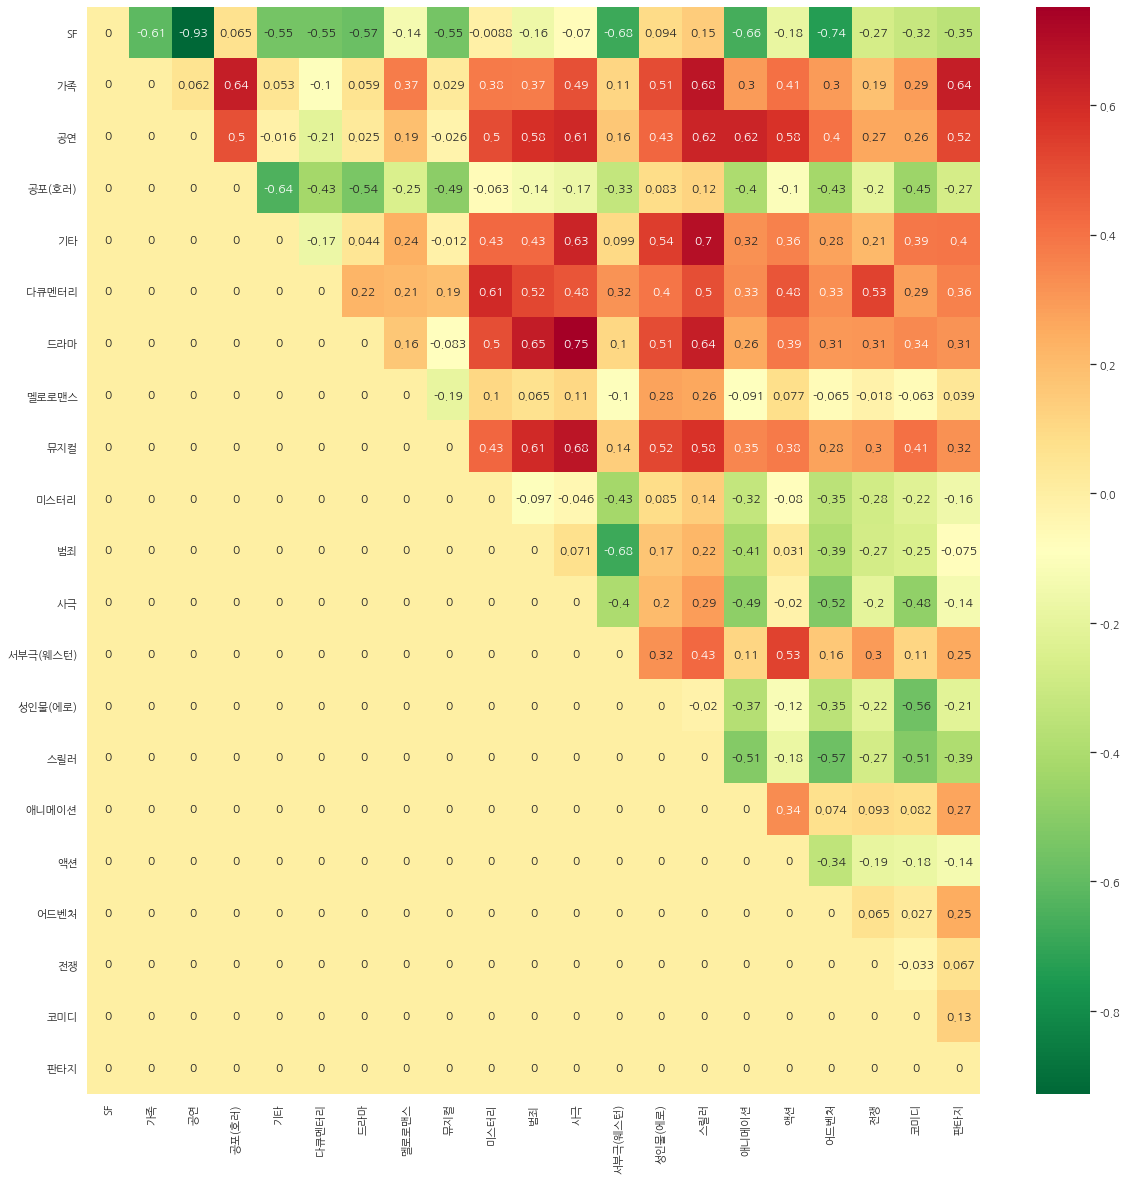

In [184]:
import numpy as np; 
import seaborn as sns; 
import matplotlib.pyplot as plt

np.random.seed(0)

sns.set(font='NanumGothic')
plt.figure(figsize = (20,20))
plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

***

# 결과 해석
절대값이 0.7이상인 결과에 대한 해석 서술  

## SF : 공연 = -0.93
상업영화는 SF에, 예술영화는 공연에 가깝다.  
  
## SF : 어드벤처 = -0.74
상업영화는 SF에, 예술영화는 어드벤처에 가깝다.  
  
## 기타 : 스릴러 = 0.7
예술영화는 기타에, 상업영화는 스릴러에 가깝다.
  
## 드라마 : 사극 = 0.75
예술영화는 드라마에, 상업영화는 사극에 가깝다.
  
### 전반적으로 공연, 기타, 다큐멘터리, 드라마, 뮤지컬 영화는 예술 영화에, SF, 공포(호러), 미스터리, 범죄, 사극, 성인물(에로), 스릴러, 액션은 상업 영화에 가까운 것으로 보입니다.

***

# 고찰
  
이번 과제를 진행하면서 모든 장르에 걸쳐서 공통적으로 나오는 단어를 제거했습니다.  
해당 단어들은 그녀, 그, 사랑 같은 상당히 보편적인 단어들이었습니다.  
아무래도 모든 장르에 공통적으로 상위권 단어에 같은 단어가 등장한다면 WEAT score 계산이 정확하게 이루어지지 않을 것이라 예상하여 진행했습니다.  
이렇게 해서 나타난 특이한 현상은 두가지입니다.  
첫째로 예술 영화에 대한 단어 추출에서 단어가 13개까지 밖에 출력되지 않았습니다.  
둘째로 히트맵 시각화에서 멜로로맨스 장르의 WEAT score가 상당히 낮은 수준으로 유지되었습니다.  
아마 전 장르에 걸쳐 공통적으로 등장하는 단어들이 멜로와 관련이 되어 있거나 예술 영화 또한 멜로적인 요소가 상당히 강하기 때문에 나타난 현상으로 생각됩니다.  
즉, 많은 영화에 멜로적인 요소가 분명히 포함되어 있고, 그 경향은 예술 영화에 더욱 두드러진다고 할 수 있겠습니다.  

***

# 개선 가능성
  
고유명사를 삭제한다면 좀 더 정확한 WEAT 값을 구할 수 있을 것으로 생각됩니다.  
하지만 고유명사만 삭제할 방도가 크게 떠오르지 않아 이번 과제에서는 실현시킬 수 없었습니다.  